**Prediction of Airline Ticket Prices Using Machine Learning**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df['arrival_time'].value_counts()
atime = df['arrival_time']
dtime = df['departure_time']

In [4]:
# Size of the data 
df.shape

(300153, 12)

In [5]:
# Dropping column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.shape

(300153, 11)

In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.notnull().sum()

airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [9]:
#checking info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [11]:
#Compute pairwise correlation of columns
df.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


**Airline vs Price Analysis**

Does price vary with Airlines?

    As we can see Vistara has Maximum Price range
    Vistara and Air_India Airlines have highest Price when compared to others
    SpiceJet , AirAsia , GO_First and Indigo have closer to similar totals
    

In [12]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

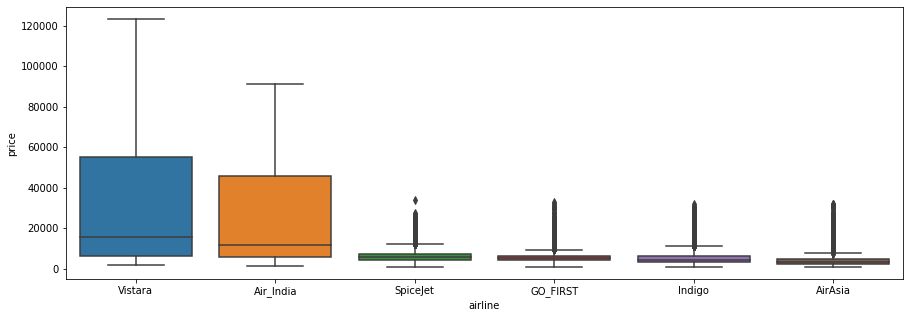

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price',x='airline',data=df.sort_values('price',ascending=False))

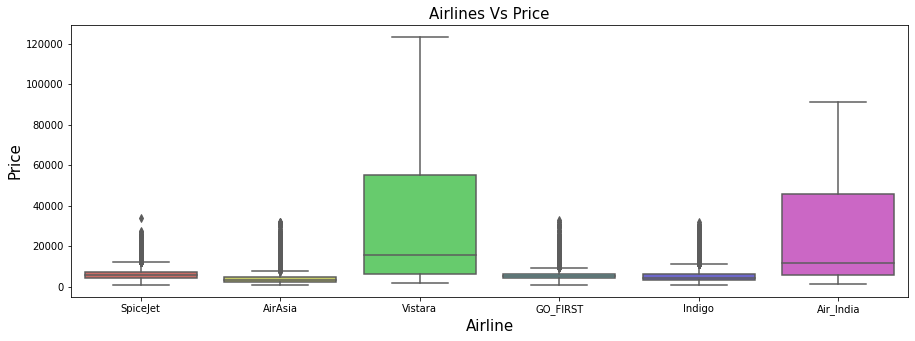

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Total Stops vs Price **

How Does the ticket price vary with the number of stops of a flight?

    One-stop flights are the most common and have the highest ticket price range

In [15]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Text(0, 0.5, 'Price')

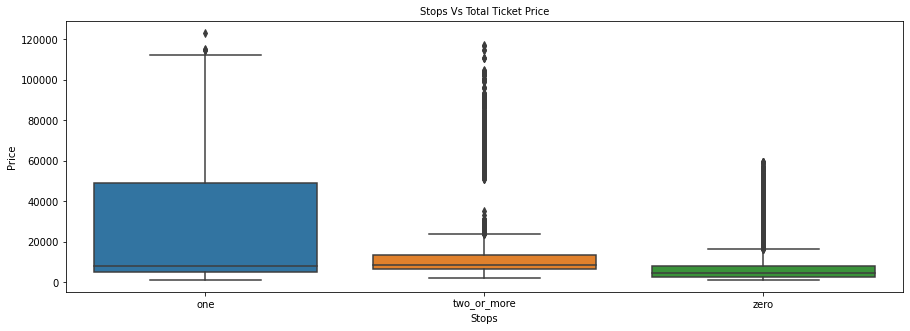

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price',x='stops',data= df.sort_values('price',ascending=False))
plt.title('Stops Vs Total Ticket Price',fontsize=10)
plt.xlabel('Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)

**Airline vs Flights Distribution**

In [17]:
#check distribution of flights per airline
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


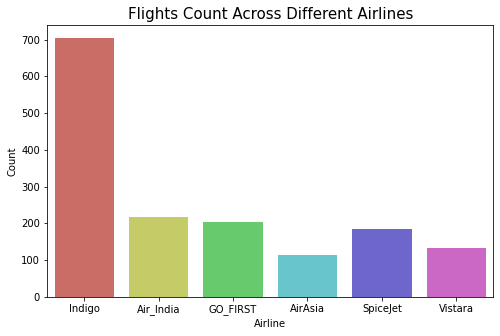

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count Across Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

This shows economy class is more popular than business class across all airlines

In [19]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

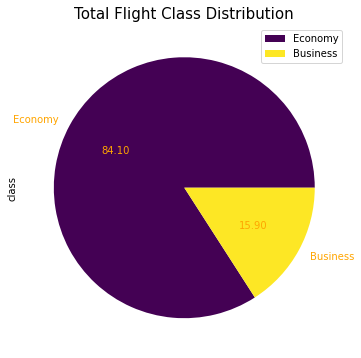

In [20]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'orange'},autopct='%.2f',cmap='viridis')
plt.title('Total Flight Class Distribution',fontsize=15)

plt.legend(['Economy','Business'])
plt.show()

**How does Ticket Price change based on the Departure Time and Arrival Time?**
1. Departure Time Vs Ticket Price

Ticket Price is More for the Flights when the Departure Time is at Night
Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
Ticket Price is Low for the Flights Having Departure Time at Late_night
2. Arrival Time Vs Ticket Price

Ticket Price is More for the Flights when the Arrival Time is at Evening
Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

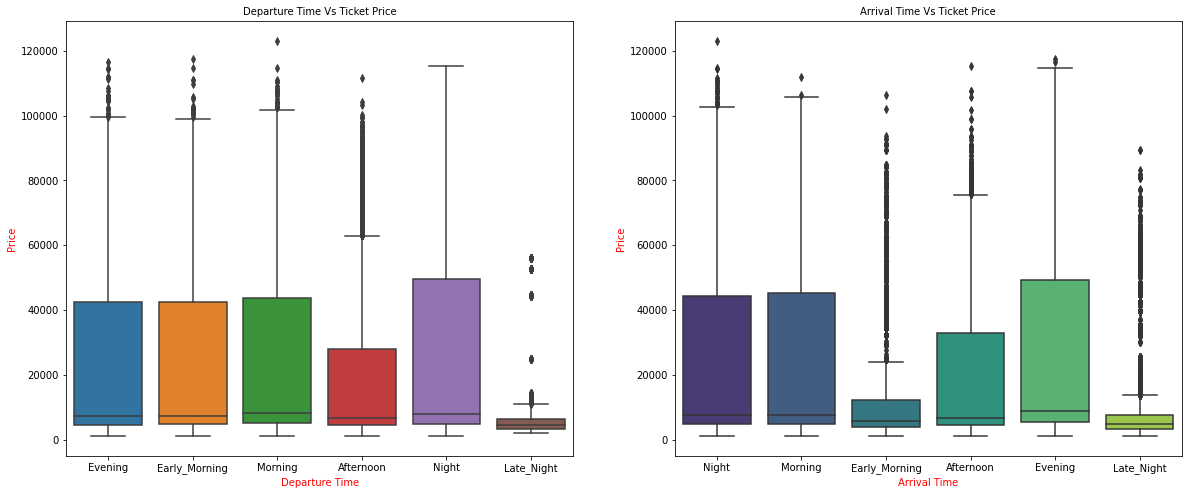

In [21]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.subplot(1,2,1)
#sns.boxplot(x='departure_time',y='price',data=df)
sns.boxplot(x=dtime,y='price',data=df)

plt.title('Departure Time Vs Ticket Price',fontsize=10)
plt.xlabel('Departure Time',fontsize=10,color = 'red')
plt.ylabel('Price',fontsize=10,color = 'red')
plt.subplot(1,2,2)
#sns.boxplot(x='arrival_time',y='price',data=df,palette='viridis')
sns.boxplot(x='arrival_time',y='price',data=df,palette='viridis')

plt.title('Arrival Time Vs Ticket Price',fontsize=10)
plt.xlabel('Arrival Time',fontsize=10,color = 'red')
plt.ylabel('Price',fontsize=10,color = 'red')
plt.show()

In [22]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [23]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

**How Price Varies with the Flight Duration Based on Class?**

With increase in Flight Duration, the Ticket Prices also increases for both the economy and business classes.

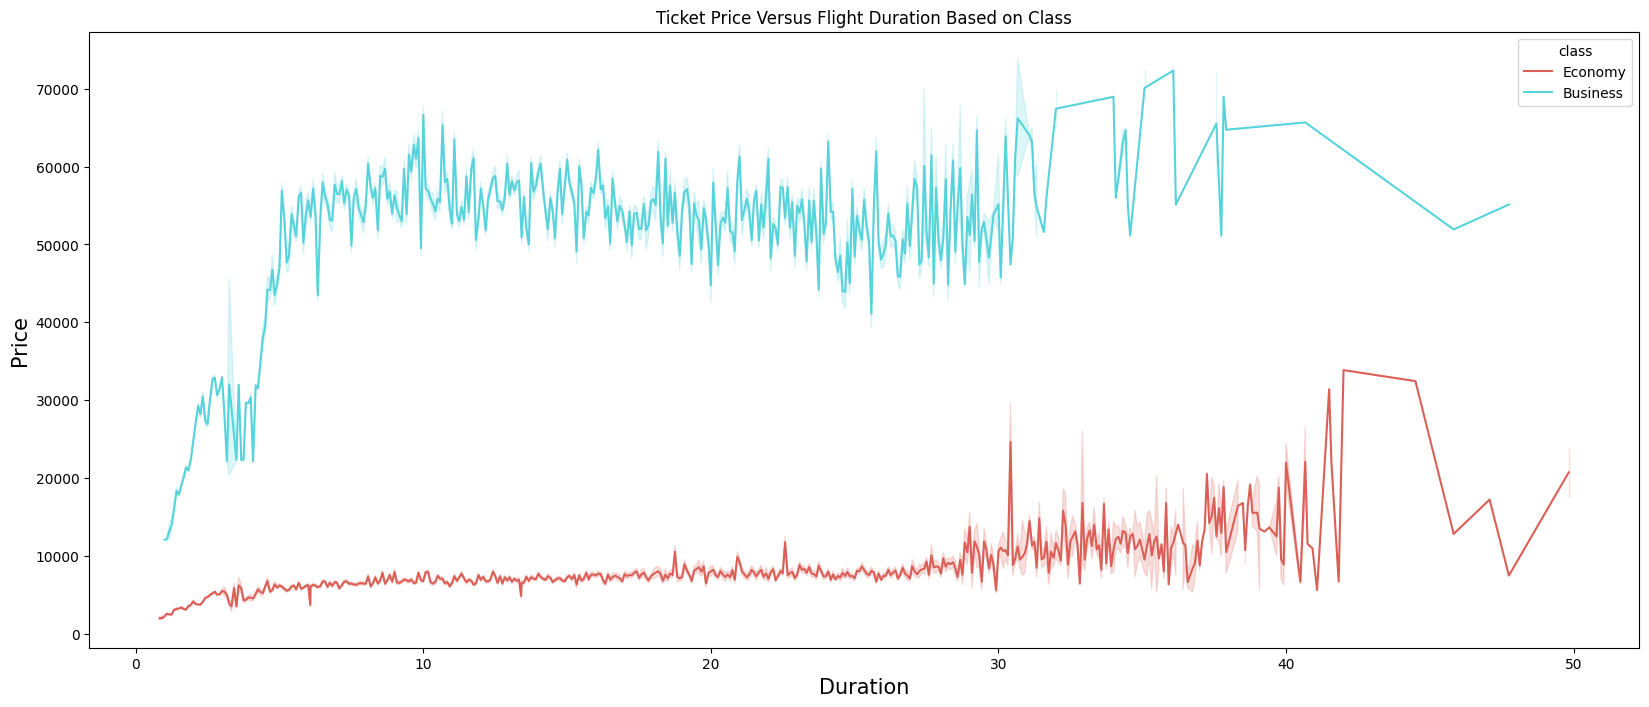

In [24]:

plt.style.use('default')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=12)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How does days left to flight affect ticket price?**

Ticket price is highest when there is 2 days left to flight date

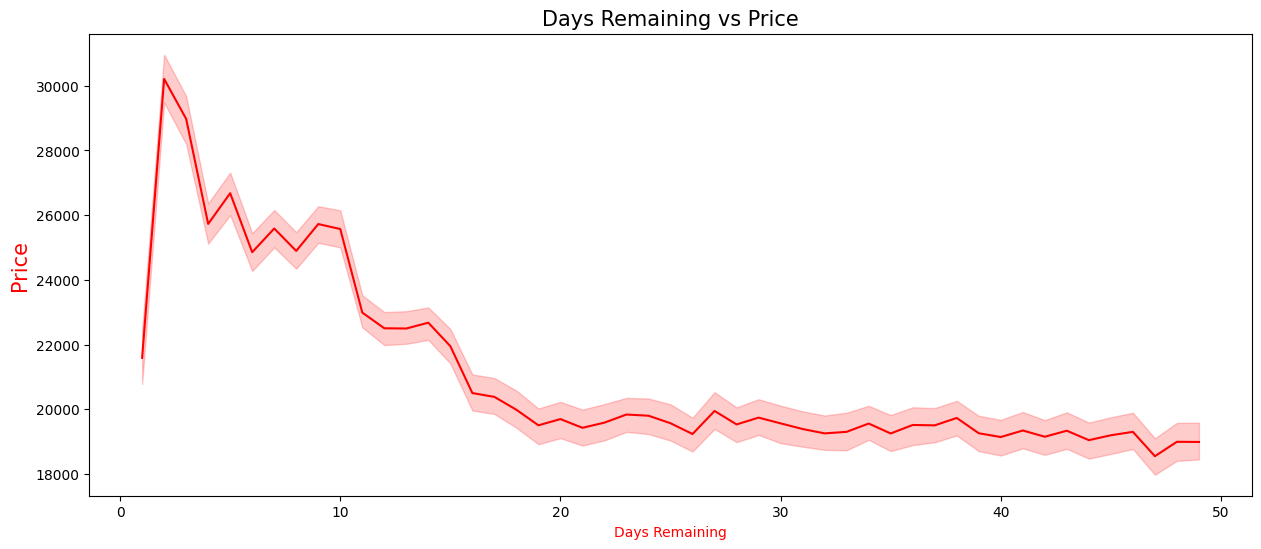

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.title('Days Remaining vs Price',fontsize=15)
plt.xlabel('Days Remaining',fontsize=10,color= 'red')
plt.ylabel('Price',fontsize=15,color = 'red')
plt.show()

This is the same case when comparing ticket prices and days remaining across the six Airlines

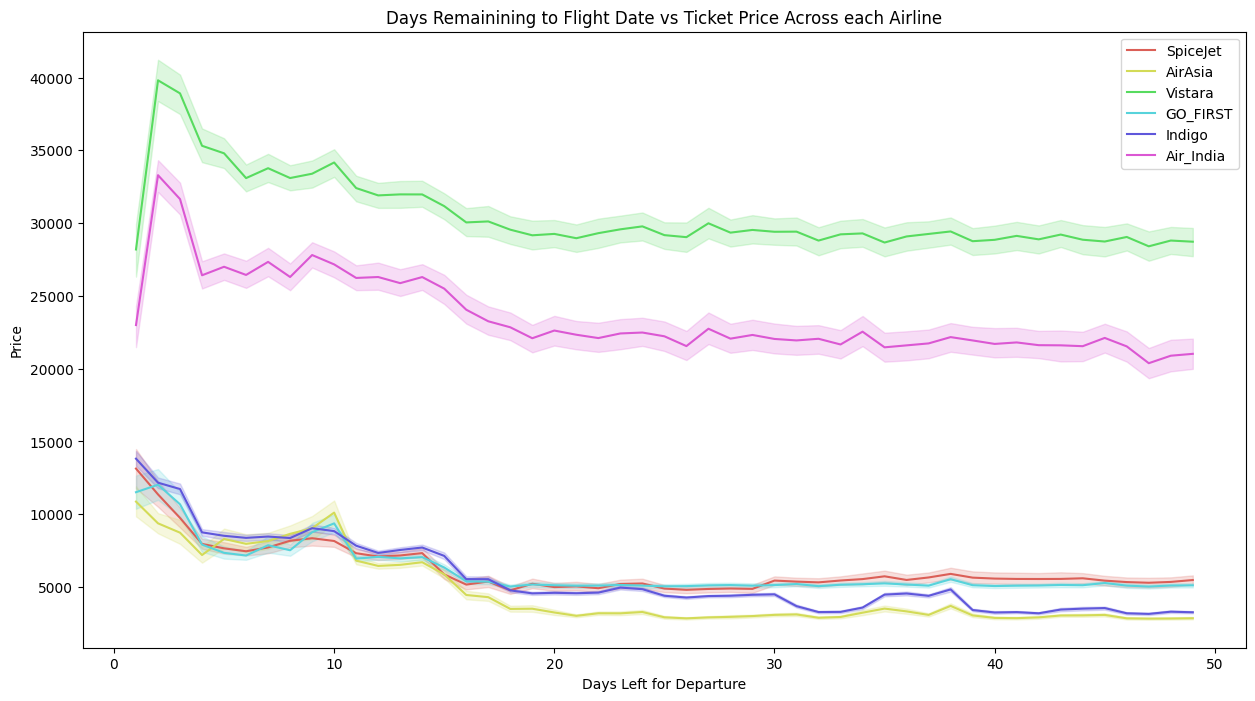

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='days_left',y='price',color='yellow',hue='airline',palette='hls')
plt.title('Days Remainining to Flight Date vs Ticket Price Across each Airline',fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Days Left for Departure',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

**Total number of Flights from one city to another**

In [27]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


Average Price of different Airlines from Source city to Destination city

In [28]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


###Converting Categorical Columns Into Numerical Columns

In [29]:
# Converting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [30]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

###Splitting the Data

In [31]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
#                                   test_size=0.20, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240122, 10), (60031, 10), (240122,), (60031,))

In [32]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [33]:
#Display Metric Results in a Dataframe
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Squared_Error_MSE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score


In [34]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()

modelrfr = RandomForestRegressor()

#MM = [modelmlg, modelrfr]

MM = [modelmlg,  modelrfr]


for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

    #r_squared = round(metrics.r2_score(y_test, y_pred),6)
    
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               #'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               #'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               #'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4628.895
Mean Squared Error (MSE): 49195805.514
Root Mean Squared Error (RMSE): 7013.972
R2_score: 0.904564
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1143.213
Mean Squared Error (MSE): 8076066.296
Root Mean Squared Error (RMSE): 2841.842
R2_score: 0.984333
------------------------------------------------------------------------------------------------------------


In [35]:
models=['LinearRegression','RandomForestRegressor']
result=pd.DataFrame({'Model_Name':models})
#result['Adj_R_Square']=Results['Adj_R_Square']
result['MAE']=Results['Mean_Absolute_Error_MAE']
result['RMSE']=Results['Root_Mean_Squared_Error_RMSE']
#result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['MSE']=Results['Mean_Squared_Error_MSE']
result['R2_score']=Results['R2_score']
#result=result.sort_values(by='R2_Score',ascending=False).reset_index(drop=True)
result

,Model_Name,MAE,RMSE,MSE,R2_score
0,LinearRegression,4628.895291,7013.972164,4.919581e+07,0.904564
1,RandomForestRegressor,1143.213348,2841.842060,8.076066e+06,0.984333


From the Above Results, The better Model by comparing Errors , Adj_R_Square and R2_Score values is RandomForestRegressor 







In [36]:
#Training the model 
modelrfr.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelrfr.predict(x_test)

In [37]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [38]:
result.sample(10)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
193041,4,1371,1,5,2,5,5,1,2.00,43,3000,3000,2984.83
42200,2,1084,2,2,0,3,1,1,5.25,44,4709,4709,4735.18
152021,1,846,4,5,0,4,1,1,12.42,43,4969,4969,5033.95
178107,1,763,3,2,0,1,1,1,15.08,23,6295,6295,6202.09
140239,1,840,4,1,0,5,0,1,13.08,34,7474,7474,7465.43
36329,3,121,2,1,0,4,1,1,5.83,10,7950,7950,8325.67
299097,1,716,1,4,0,2,3,0,9.42,27,51345,51345,51517.27
82129,5,1537,5,2,0,4,1,1,14.17,36,3998,3998,4207.32
267943,5,1444,4,5,0,4,0,0,15.42,12,60978,60978,61944.81
200200,1,716,1,4,0,5,4,1,12.42,25,5624,5624,6316.40


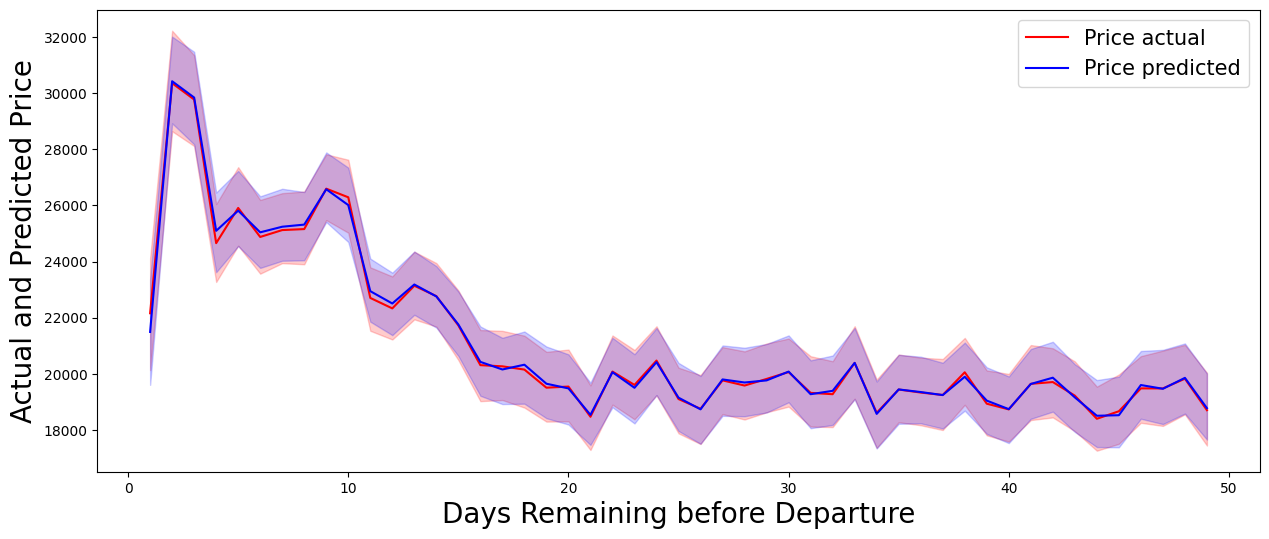

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
#plt.title('Days Remaining before Departure Vs Actual Ticket Price and Predicted Ticket Price',fontsize=12)
plt.legend(labels=['Price actual','Price predicted'],fontsize=15)
plt.xlabel('Days Remaining before Departure',fontsize=20)
plt.ylabel('Actual and Predicted Price',fontsize=20)
plt.show()



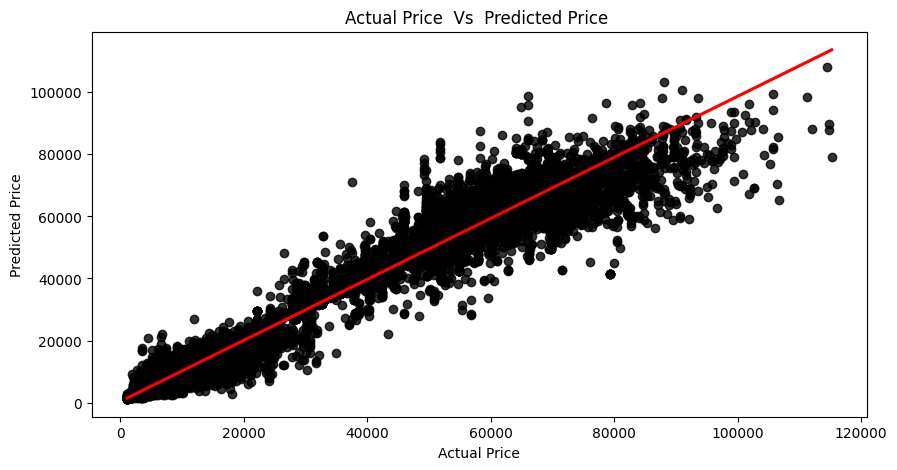

In [40]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Actual Price  Vs  Predicted Price ',fontsize=12)
plt.xlabel('Actual Price',fontsize=10)
plt.ylabel('Predicted Price',fontsize=10)
plt.show()



###**Cross Validating Model**

We will use 10 fold cross validation 

Documentation: https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation

In [41]:
# init our linear regression class / object
lm = LinearRegression()

# Fit our training data
model = lm.fit(x, y)

####What is the difference between cross_val_score and cross_validate?


`Cross_val_score` and `cross_validate` have the same core functionality and share a very similar setup, but they differ in two ways:

1. `Cross_val_score` runs single metric cross validation whilst `cross_validate` runs multi metric. This means that cross_val_score will only accept a single metric and return this for each fold, whilst cross_validate accepts a list of multiple metrics and will return all these for each fold.


2. `Cross_validate` returns extra information not found in `cross_val_score`. In addition to the test scores, `cross_validate` also returns the fit times and score times.

In [42]:
#import nessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Perform 10-fold cross validation
model = LinearRegression()
#scores = cross_val_score(lm, x, y, cv=10, scoring='neg_root_mean_squared_error')
scores = cross_val_score(lm, x, y, cv=10, scoring='neg_mean_absolute_error')

scores_pos = - scores 
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



Mean score of -4846.31 with a standard deviation of 2750.91


In [43]:
# Running cross_validate with multi metric
metrics = ['neg_mean_absolute_error', 'r2','neg_root_mean_squared_error']
scores = cross_validate(model, x, y, cv=10, scoring=metrics)

mae_scores = scores['test_neg_mean_absolute_error']
RMSE_scores = scores['test_neg_root_mean_squared_error']
r2_scores = scores['test_r2']

print("Mean mae of %0.2f with a standard deviation of %0.2f" % (mae_scores.mean(), mae_scores.std()))
print("Mean r2 of %0.2f with a standard deviation of %0.2f" % (r2_scores.mean(), r2_scores.std()))
print("Mean RMSE of %0.2f with a standard deviation of %0.2f" % (RMSE_scores.mean(), RMSE_scores.std()))



Mean mae of -4846.31 with a standard deviation of 2750.91
Mean r2 of 0.09 with a standard deviation of 0.27
Mean RMSE of -6337.96 with a standard deviation of 3558.25
